In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('big mart sales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df['Item_Weight'].mean()

12.857645184136183

In [7]:
map1 = {"Small":1,"Medium":2,"High":3}
df["Outlet_Size"] = df["Outlet_Size"].map(map1)
df["Item_Weight"] = df["Item_Weight"].fillna(df['Item_Weight'].mean())
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].median())

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

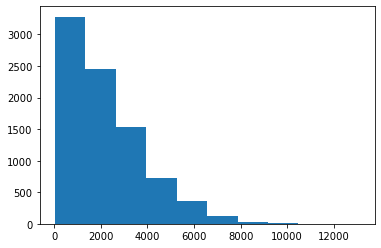

In [9]:
plt.figure('figsize') == (10,10)
plt.hist(df["Item_Outlet_Sales"])


In [10]:
#By looking at above graph it looks like data is right skewd.

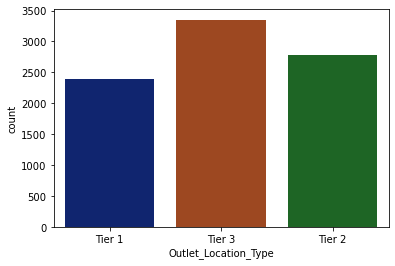

In [11]:
sns.countplot(df["Outlet_Location_Type"],palette = 'dark')
plt.show()

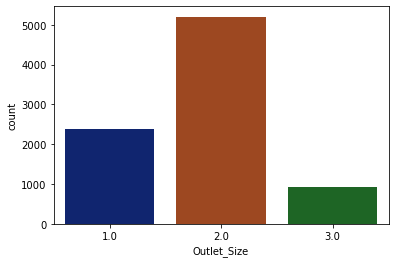

In [12]:
sns.countplot(df["Outlet_Size"],palette = 'dark')
plt.show()

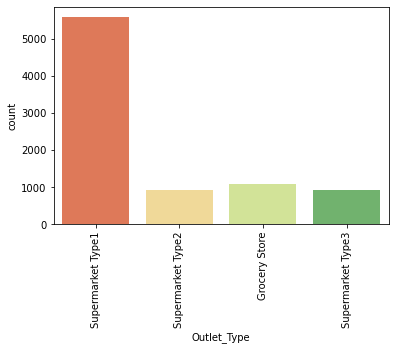

In [13]:
sns.countplot(df["Outlet_Type"],palette = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

In [14]:
df.drop(['Outlet_Establishment_Year'] , inplace = True, axis = 1)

In [15]:
#splitting numeric data and categorical data
df_num=df.select_dtypes(["int",'float'])
df_cat=df.select_dtypes(object)

In [16]:
df_cat=df.select_dtypes("object")
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2


In [17]:
df_num=df.select_dtypes(["int","float"])

In [18]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,2.0,3735.1380
1,5.920,0.019278,48.2692,2.0,443.4228
2,17.500,0.016760,141.6180,2.0,2097.2700
3,19.200,0.000000,182.0950,2.0,732.3800
4,8.930,0.000000,53.8614,3.0,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,3.0,2778.3834
8519,8.380,0.046982,108.1570,2.0,549.2850
8520,10.600,0.035186,85.1224,1.0,1193.1136
8521,7.210,0.145221,103.1332,2.0,1845.5976


In [19]:
df_cat=df.select_dtypes(object)
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2


# so now we will perform label encoding on categorical data so that we can convert all the categorical data into numeric data so that we can train our model

In [20]:

from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])    
    

In [21]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,0,1
1,8,2,14,3,2,2
2,662,1,10,9,0,1
3,1121,2,6,0,2,0
4,1297,1,9,1,2,1
...,...,...,...,...,...,...
8518,370,1,13,1,2,1
8519,897,2,0,7,1,1
8520,1357,1,8,6,1,1
8521,681,2,13,3,2,2


In [22]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,2.0,3735.1380
1,5.920,0.019278,48.2692,2.0,443.4228
2,17.500,0.016760,141.6180,2.0,2097.2700
3,19.200,0.000000,182.0950,2.0,732.3800
4,8.930,0.000000,53.8614,3.0,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,3.0,2778.3834
8519,8.380,0.046982,108.1570,2.0,549.2850
8520,10.600,0.035186,85.1224,1.0,1193.1136
8521,7.210,0.145221,103.1332,2.0,1845.5976


# concatenate of df_num and df_cat so that we can regain our original data

In [23]:
df=pd.concat([df_num,df_cat],axis=1)
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,2.0,3735.1380,156,1,4,9,0,1
1,5.920,0.019278,48.2692,2.0,443.4228,8,2,14,3,2,2
2,17.500,0.016760,141.6180,2.0,2097.2700,662,1,10,9,0,1
3,19.200,0.000000,182.0950,2.0,732.3800,1121,2,6,0,2,0
4,8.930,0.000000,53.8614,3.0,994.7052,1297,1,9,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,3.0,2778.3834,370,1,13,1,2,1
8519,8.380,0.046982,108.1570,2.0,549.2850,897,2,0,7,1,1
8520,10.600,0.035186,85.1224,1.0,1193.1136,1357,1,8,6,1,1
8521,7.210,0.145221,103.1332,2.0,1845.5976,681,2,13,3,2,2


# separating x and y

In [24]:
x = df.drop(labels = ["Item_Outlet_Sales"],axis=1)
y = df["Item_Outlet_Sales"]
x.shape,y.shape

((8523, 10), (8523,))

In [25]:
x = df[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,2.0,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2.0,2,2
2,662,17.500,1,0.016760,10,141.6180,9,2.0,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,2.0,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,3.0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,3.0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2.0,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,1.0,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2.0,2,2


In [26]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,2.0,3735.1380,156,1,4,9,0,1
1,5.92,0.019278,48.2692,2.0,443.4228,8,2,14,3,2,2
2,17.50,0.016760,141.6180,2.0,2097.2700,662,1,10,9,0,1
3,19.20,0.000000,182.0950,2.0,732.3800,1121,2,6,0,2,0
4,8.93,0.000000,53.8614,3.0,994.7052,1297,1,9,1,2,1


In [27]:
y = df['Item_Outlet_Sales']

In [28]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Train & test

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# model building

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [31]:
def buildmodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(f"MAE = {mean_absolute_error(ytest,ypred)}")
    print(f"MSE = {mean_squared_error(ytest,ypred)}")
    print(f"RMSE = {np.sqrt(mean_absolute_error(ytest,ypred))}")
    print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

In [32]:
lr=LinearRegression()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
svm=SVR()

In [33]:
buildmodel(lr)

MAE = 904.335807006205
MSE = 1419784.5477490781
RMSE = 30.072176625681834
Accuracy= 51.19%


In [34]:
buildmodel(kn)

MAE = 1137.015484427063
MSE = 2339800.4279270014
RMSE = 33.71966020628119
Accuracy= 19.56%


In [35]:
buildmodel(dt)

MAE = 1035.815290496676
MSE = 2223439.114610261
RMSE = 32.18408442843568
Accuracy= 23.56%


In [36]:
buildmodel(svm)

MAE = 1315.602288858951
MSE = 2995187.4414858706
RMSE = 36.27123224897316
Accuracy= -2.97%


In [37]:
for i in range(1,50):
    dt1=DecisionTreeRegressor(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")

1:0.2360944515448049
2:0.43983126178794874
3:0.5302406975638865
4:0.583410469235927
5:0.5855050935799857
6:0.5882712568280337
7:0.5790078248301491
8:0.5649368267434086
9:0.5463874040374277
10:0.5289560998362834
11:0.49485711067959803
12:0.47159598203667574
13:0.4391081474832883
14:0.40299120073230044
15:0.37313784722434884
16:0.35760337280796206
17:0.3076759249838279
18:0.2928913565186513
19:0.2839010810474817
20:0.26526293813490875
21:0.2583121881318249
22:0.2558454906892108
23:0.24846255250388283
24:0.24684061653915923
25:0.2419445757496379
26:0.23997388062219038
27:0.25001067370167673
28:0.2454196845002271
29:0.21630123843797155
30:0.24503381752524123
31:0.22267934296517755
32:0.22314203172397784
33:0.24525641399163156
34:0.23521787802910243
35:0.21376939506639892
36:0.2272695335666698
37:0.21814202988732445
38:0.24293083171900554
39:0.22657599711632703
40:0.24213374083671457
41:0.23654093000200693
42:0.2275596304271157
43:0.2272071092193344
44:0.22633020416943805
45:0.2239573967131

In [38]:
dt2=DecisionTreeRegressor(max_depth=6)
buildmodel(dt2)

MAE = 766.4978232756639
MSE = 1210282.9282740331
RMSE = 27.685697088490727
Accuracy= 58.39%


In [39]:
for i in range(1,50):
    dt3=DecisionTreeRegressor(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")


1:0.25055581692914275
2:0.27686825258926184
3:0.33417037991148246
4:0.3931078106203747
5:0.4363390601328673
6:0.45286656527630575
7:0.4759433003939204
8:0.49530267005186834
9:0.5063527819557876
10:0.5292035931757084
11:0.530038664764312
12:0.5386075162492361
13:0.5289375784639282
14:0.5361176138038986
15:0.540968939080315
16:0.5440911775245881
17:0.5554809079206913
18:0.553054304029664
19:0.5519571329728217
20:0.5504173586719499
21:0.556758867254947
22:0.5567630310976486
23:0.5590935695291879
24:0.5623304549642549
25:0.5629723215498832
26:0.5689908567422108
27:0.5688918013479352
28:0.5683532531587587
29:0.5685109109416221
30:0.5700789921665461
31:0.5698587949817616
32:0.573557629225345
33:0.5722248553795843
34:0.5756978005813269
35:0.5743033106756945
36:0.5751589543521909
37:0.5739077744754078
38:0.5793494411975904
39:0.5812021672617232
40:0.5837412966296901
41:0.5846811273934049
42:0.5843500043252547
43:0.5836862204247792
44:0.582612740506658
45:0.58258882199533
46:0.5830101820585303


In [40]:
dt3=DecisionTreeRegressor(max_depth=5)
buildmodel(dt3)

MAE = 765.9017531496863
MSE = 1205984.8445367392
RMSE = 27.67493004778307
Accuracy= 58.54%


In [41]:
for i in range(1,50):
    dt3=DecisionTreeRegressor(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")


1:0.22102328903899593
2:0.2766689574956126
3:0.33493438442874335
4:0.39388866285686475
5:0.43608179472858144
6:0.45305141221252043
7:0.47654951307874627
8:0.4950958817511302
9:0.5063527819557876
10:0.5292035931757084
11:0.530038664764312
12:0.5386075162492361
13:0.5289375784639282
14:0.5361176138038986
15:0.5409689390803148
16:0.5440911775245881
17:0.5554809079206913
18:0.5530543040296639
19:0.5519571329728217
20:0.5504173586719499
21:0.556758867254947
22:0.5567630310976486
23:0.5590935695291879
24:0.562330454964255
25:0.5629723215498832
26:0.5689908567422108
27:0.5688918013479352
28:0.5683532531587587
29:0.5685109109416222
30:0.570078992166546
31:0.5698587949817617
32:0.573557629225345
33:0.5722248553795843
34:0.575697800581327
35:0.5743033106756945
36:0.5751589543521909
37:0.5739077744754078
38:0.5793494411975904
39:0.5812021672617232
40:0.5837412966296901
41:0.5846811273934049
42:0.5843500043252546
43:0.5836862204247792
44:0.582612740506658
45:0.58258882199533
46:0.5830101820585303


In [52]:
dt4=DecisionTreeRegressor(min_samples_leaf=49)
buildmodel(dt4)

MAE = 772.4599747798906
MSE = 1212175.3801937113
RMSE = 27.79316417358575
Accuracy= 58.33%


In [43]:
for i in range(49,100):
    dt5=DecisionTreeRegressor(min_samples_split=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    print(f"{i}:{r2_score(ytest,ypred)}")

49:0.5182966447410601
50:0.5204921964602744
51:0.5189455597306049
52:0.5218608658153154
53:0.5275378917413159
54:0.5280464811495642
55:0.5301483087915493
56:0.5307345503330857
57:0.5316967937061636
58:0.5340909344228271
59:0.5351655673401743
60:0.5356118462866335
61:0.5375599748336547
62:0.5375320257113463
63:0.5375317394640082
64:0.5401306063200004
65:0.5420868769611815
66:0.5414439529775665
67:0.5403724631163922
68:0.5405942829179738
69:0.5418946429840938
70:0.5402392119765683
71:0.5406041418852293
72:0.5403772760900603
73:0.5423277641901711
74:0.542846596200805
75:0.5429260417506361
76:0.5424455994862987
77:0.5430698747214033
78:0.5443609783109851
79:0.544400796533022
80:0.5449580380903772
81:0.5443816109663121
82:0.5444314867691764
83:0.5445985297037476
84:0.5457941256737313
85:0.5458725457877701
86:0.5458460619178137
87:0.5454443597875362
88:0.545433367533583
89:0.5456086911229463
90:0.545483626154915
91:0.5460047800229203
92:0.5461396768910521
93:0.5464045766556622
94:0.546344233

In [53]:
dt6=DecisionTreeRegressor(min_samples_split=99)
buildmodel(dt6)

MAE = 794.9235901204663
MSE = 1304068.633131043
RMSE = 28.19438933760521
Accuracy= 55.17%


In [45]:
models=[]
accuracy=[]
models.append(("logrg",LinearRegression()))
models.append(("dt",DecisionTreeRegressor()))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    accuracy.append(r2_score(ytest,ypred))

In [46]:
accuracy

[0.5119168487775418, 0.2402861122535006]

In [47]:
from sklearn.ensemble import VotingRegressor

In [48]:
models

[('logrg', LinearRegression()), ('dt', DecisionTreeRegressor())]

In [49]:
vc=VotingRegressor(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(r2_score(ytest,ypred))

0.4924451395045999


In [50]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
print(r2_score(ytest,ypred))

0.4060563323354348


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print(r2_score(ytest,ypred))

0.6040908710935304
